## Collaborative Filtering Recommendation System

### Download dependencies

In [14]:
# pip install numpy

In [15]:
# pip install pandas

In [16]:
# pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/rocm6.2.4

In [17]:
# pip install fastparquet

In [18]:
# pip install pyarrow

In [19]:
# pip install tqdm

In [20]:
# pip install scikit-learn

In [21]:
# pip install matplotlib

In [22]:
import pandas as pd 
import torch 
import numpy as np
from torch.autograd import Variable
from tqdm import tqdm


In [23]:
torch.cuda.is_available()

True

## Data Visualization

In [24]:
animes_df = pd.read_parquet('dataset/cleaned_animes.parquet')
ratings_df = pd.read_parquet('dataset/cleaned_user_ratings.parquet')

In [25]:
animes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13125 entries, 0 to 24831
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   anime_id   13125 non-null  int64 
 1   Name       13125 non-null  object
 2   Score      13125 non-null  object
 3   Genres     13125 non-null  object
 4   Synopsis   13125 non-null  object
 5   Type       13125 non-null  object
 6   Aired      13125 non-null  object
 7   Premiered  13125 non-null  object
 8   Producers  13125 non-null  object
 9   Licensors  13125 non-null  object
 10  Studios    13125 non-null  object
 11  Rating     13125 non-null  object
 12  Members    13125 non-null  int64 
 13  Image URL  13125 non-null  object
dtypes: int64(2), object(12)
memory usage: 1.5+ MB


In [26]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23981066 entries, 0 to 24325190
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   user_id     int64 
 1   Username    object
 2   anime_id    int64 
 3   anime_name  object
 4   rating      int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ GB


In [27]:
ratings_df['rating_id'] = ratings_df.index+1

In [28]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23981066 entries, 0 to 24325190
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   user_id     int64 
 1   Username    object
 2   anime_id    int64 
 3   anime_name  object
 4   rating      int64 
 5   rating_id   int64 
dtypes: int64(4), object(2)
memory usage: 1.3+ GB


In [29]:
print(animes_df.shape)
print(ratings_df.shape)

(13125, 14)
(23981066, 6)


In [30]:
animes_df.head()

,anime_id,Name,Score,Genres,Synopsis,Type,Aired,Premiered,Producers,Licensors,Studios,Rating,Members,Image URL
0,1,Cowboy Bebop,8.75,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","Crime is timeless. By the year 2071, humanity ...",TV,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,R - 17+ (violence & profanity),1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Drama, Mystery, Sci-Fi, Space","Another day, another bounty—such is the life o...",Movie,"Sep 1, 2001",UNKNOWN,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,R - 17+ (violence & profanity),360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,8.22,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0...",TV,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,PG-13 - Teens 13 or older,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,7.25,"Action, Mystery, Police, Supernatural, Drama, ...",Robin Sena is a powerful craft user drafted in...,TV,"Jul 3, 2002 to Dec 25, 2002",summer 2002,"Bandai Visual, Dentsu, Victor Entertainment, T...","Funimation, Bandai Entertainment",Sunrise,PG-13 - Teens 13 or older,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,6.94,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...,TV,"Sep 30, 2004 to Sep 29, 2005",fall 2004,"TV Tokyo, Dentsu",Illumitoon Entertainment,Toei Animation,PG - Children,15001,https://cdn.myanimelist.net/images/anime/7/215...


In [10]:
ratings_df.head()

,user_id,Username,anime_id,anime_name,rating,rating_id
0,1,Xinil,21,One Piece,9,1
1,1,Xinil,48,.hack//Sign,7,2
3,1,Xinil,49,Aa! Megami-sama!,8,4
4,1,Xinil,304,Aa! Megami-sama! Movie,8,5
5,1,Xinil,306,Abenobashi Mahou☆Shoutengai,8,6


In [32]:
animes_df[animes_df['anime_id'] == 96]

,anime_id,Name,Score,Genres,Synopsis,Type,Aired,Premiered,Producers,Licensors,Studios,Rating,Members,Image URL
75,96,Kidou Butouden G Gundam,7.57,"Adventure, Comedy, Drama, Martial Arts, Mecha,...","In the year Future Century 0060, the many coun...",TV,"Apr 1, 1994 to Mar 31, 1995",spring 1994,"TV Asahi, Sotsu",Bandai Entertainment,Sunrise,PG-13 - Teens 13 or older,66828,https://cdn.myanimelist.net/images/anime/1187/...


In [33]:
animes_df[animes_df['Name'] == 'Kimi ga Nozomu Eien']

,anime_id,Name,Score,Genres,Synopsis,Type,Aired,Premiered,Producers,Licensors,Studios,Rating,Members,Image URL
125,147,Kimi ga Nozomu Eien,7.18,"Drama, Romance, Slice of Life","In the warmth of a golden sun, timid high scho...",TV,"Oct 5, 2003 to Jan 4, 2004",fall 2003,"Lantis, Media Factory, Age",Funimation,Studio Fantasia,R+ - Mild Nudity,139156,https://cdn.myanimelist.net/images/anime/5/102...


In [34]:
anime_names = animes_df.set_index('anime_id')['Name'].to_dict()
n_users = len(ratings_df.user_id.unique())
n_items = len(ratings_df.anime_id.unique())

print(f"Number of unique users : {n_users}")
print(f"Number of unique animes : {n_items}")
print(f"Number of ratings : {len(ratings_df)}")

Number of unique users : 268664
Number of unique animes : 13125
Number of ratings : 23981066


In [35]:
class MatrixFactorization(torch.nn.Module):
    def __init__(self, n_users, n_items, n_factors=20):
        super().__init__()

        self.user_factors = torch.nn.Embedding(n_users,n_factors)
        self.item_factors = torch.nn.Embedding(n_items,n_factors)

        self.user_factors.weight.data.uniform_(0,0.05)
        self.item_factors.weight.data.uniform_(0,0.05)

    def forward(self,data):
        users, items = data[:,0],data[:,1]
        return (self.user_factors(users) * self.item_factors(items)).sum(1)
    
    def predict(self,user,item):
        return self.forward(user,item)

In [36]:
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader

class Loader(Dataset):
    def __init__(self):
        self.ratings = ratings_df.copy()

        users = ratings_df['user_id'].unique()
        animes = ratings_df['anime_id'].unique()

        self.userid2idx = {o:i for i,o in enumerate(users)}
        self.animeid2idx = {o:i for i,o in enumerate(animes)}

        self.idx2userid = {i:o for o,i in self.userid2idx.items()}
        self.idx2uanimeid = {i:o for o,i in self.animeid2idx.items()}

        self.ratings.anime_id = ratings_df.anime_id.apply(lambda x: self.animeid2idx[x])
        self.ratings.user_id = ratings_df.user_id.apply(lambda x: self.userid2idx[x])

        self.x = self.ratings.drop(['rating','rating_id','Username','anime_name'],axis=1).values
        self.y = self.ratings['rating'].values
        
        self.x, self.y = torch.tensor(self.x), torch.tensor(self.y)

    def __getitem__(self, index):
        return (self.x[index], self.y[index])
    
    def __len__(self):
        return len(self.ratings)
        

In [37]:
num_epochs = 20
cuda = torch.cuda.is_available()

print(f"Running on GPU : {cuda}")

model = MatrixFactorization(n_users, n_items, n_factors=32)
print(model)

for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

if cuda:
    model = model.cuda()

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=5e-4, weight_decay=1e-6)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

train_set = Loader()
train_loader = DataLoader(train_set,4096,shuffle=True)

Running on GPU : True
MatrixFactorization(
  (user_factors): Embedding(268664, 32)
  (item_factors): Embedding(13125, 32)
)
user_factors.weight tensor([[0.0464, 0.0361, 0.0138,  ..., 0.0007, 0.0343, 0.0392],
        [0.0298, 0.0447, 0.0408,  ..., 0.0342, 0.0213, 0.0161],
        [0.0366, 0.0265, 0.0005,  ..., 0.0132, 0.0256, 0.0379],
        ...,
        [0.0303, 0.0408, 0.0176,  ..., 0.0167, 0.0047, 0.0135],
        [0.0476, 0.0383, 0.0243,  ..., 0.0182, 0.0155, 0.0010],
        [0.0250, 0.0201, 0.0355,  ..., 0.0421, 0.0075, 0.0323]])
item_factors.weight tensor([[0.0433, 0.0090, 0.0470,  ..., 0.0179, 0.0105, 0.0190],
        [0.0017, 0.0459, 0.0346,  ..., 0.0279, 0.0221, 0.0406],
        [0.0447, 0.0396, 0.0035,  ..., 0.0278, 0.0437, 0.0070],
        ...,
        [0.0185, 0.0089, 0.0342,  ..., 0.0011, 0.0361, 0.0178],
        [0.0257, 0.0119, 0.0369,  ..., 0.0105, 0.0344, 0.0048],
        [0.0262, 0.0053, 0.0338,  ..., 0.0330, 0.0182, 0.0287]])


In [38]:
for it in tqdm(range(num_epochs)):
    losses = []
    for x,y in train_loader:
        if cuda:
            x,y = x.cuda(), y.cuda()
            optimizer.zero_grad()
            outputs = model(x)
            loss = loss_fn(outputs.squeeze(), y.type(torch.float32))
            losses.append(loss.item())
            loss.backward()
            optimizer.step()

    avg_loss = sum(losses) / len(losses)
    scheduler.step(avg_loss)
    print(f"Iter #{it+1}, Loss : {avg_loss}")

  5%|▌         | 1/20 [02:32<48:13, 152.31s/it]

Iter #1, Loss : 15.622827847242151


 10%|█         | 2/20 [05:01<45:05, 150.29s/it]

Iter #2, Loss : 2.483001856779462


 15%|█▌        | 3/20 [07:29<42:20, 149.41s/it]

Iter #3, Loss : 2.0159573996606595


 20%|██        | 4/20 [09:58<39:47, 149.24s/it]

Iter #4, Loss : 1.8957752140844917


 25%|██▌       | 5/20 [12:27<37:16, 149.11s/it]

Iter #5, Loss : 1.8495046800675299


 30%|███       | 6/20 [14:56<34:49, 149.24s/it]

Iter #6, Loss : 1.8281146791834388


 35%|███▌      | 7/20 [17:26<32:21, 149.36s/it]

Iter #7, Loss : 1.8166555137536549


 40%|████      | 8/20 [19:55<29:51, 149.33s/it]

Iter #8, Loss : 1.8082977759135674


 45%|████▌     | 9/20 [22:25<27:22, 149.34s/it]

Iter #9, Loss : 1.7955563747404377


 50%|█████     | 10/20 [24:54<24:53, 149.34s/it]

Iter #10, Loss : 1.7664356027476102


 55%|█████▌    | 11/20 [27:24<22:25, 149.45s/it]

Iter #11, Loss : 1.721690278069572


 60%|██████    | 12/20 [29:53<19:55, 149.38s/it]

Iter #12, Loss : 1.680464883017601


 65%|██████▌   | 13/20 [32:22<17:25, 149.42s/it]

Iter #13, Loss : 1.6424476332790723


 70%|███████   | 14/20 [34:52<14:57, 149.56s/it]

Iter #14, Loss : 1.6037013387802215


 75%|███████▌  | 15/20 [37:22<12:28, 149.69s/it]

Iter #15, Loss : 1.5624408044945368


 80%|████████  | 16/20 [39:52<09:59, 149.79s/it]

Iter #16, Loss : 1.517445099567573


 85%|████████▌ | 17/20 [42:23<07:30, 150.10s/it]

Iter #17, Loss : 1.4698548910864186


 90%|█████████ | 18/20 [44:52<04:59, 149.83s/it]

Iter #18, Loss : 1.4226704241983104


 95%|█████████▌| 19/20 [47:21<02:29, 149.48s/it]

Iter #19, Loss : 1.3789727463262087


100%|██████████| 20/20 [49:50<00:00, 149.52s/it]

Iter #20, Loss : 1.33990751740059


In [39]:
for it in tqdm(range(20)):
    losses = []
    for x,y in train_loader:
        if cuda:
            x,y = x.cuda(), y.cuda()
            optimizer.zero_grad()
            outputs = model(x)
            loss = loss_fn(outputs.squeeze(), y.type(torch.float32))
            losses.append(loss.item())
            loss.backward()
            optimizer.step()

    avg_loss = sum(losses) / len(losses)
    scheduler.step(avg_loss)
    print(f"Iter #{it+21}, Loss : {avg_loss}")

  5%|▌         | 1/20 [02:28<47:03, 148.59s/it]

Iter #21, Loss : 1.3057929388179828


 10%|█         | 2/20 [04:57<44:34, 148.58s/it]

Iter #22, Loss : 1.2766231017475145


 15%|█▌        | 3/20 [07:27<42:21, 149.50s/it]

Iter #23, Loss : 1.251659235498215


 20%|██        | 4/20 [10:03<40:32, 152.05s/it]

Iter #24, Loss : 1.2309252347221342


 25%|██▌       | 5/20 [12:41<38:29, 153.99s/it]

Iter #25, Loss : 1.2134512649449805


 30%|███       | 6/20 [15:14<35:51, 153.68s/it]

Iter #26, Loss : 1.198656538854187


 35%|███▌      | 7/20 [17:46<33:12, 153.26s/it]

Iter #27, Loss : 1.1860273339420582


 40%|████      | 8/20 [20:21<30:44, 153.69s/it]

Iter #28, Loss : 1.1752230463936022


 45%|████▌     | 9/20 [22:55<28:12, 153.88s/it]

Iter #29, Loss : 1.1655601747620319


 50%|█████     | 10/20 [25:25<25:27, 152.76s/it]

Iter #30, Loss : 1.1572412018690428


 55%|█████▌    | 11/20 [27:54<22:43, 151.49s/it]

Iter #31, Loss : 1.1496940833905331


 60%|██████    | 12/20 [30:23<20:05, 150.68s/it]

Iter #32, Loss : 1.1434846066492017


 65%|██████▌   | 13/20 [32:52<17:31, 150.21s/it]

Iter #33, Loss : 1.1377841862830007


 70%|███████   | 14/20 [35:21<14:59, 149.85s/it]

Iter #34, Loss : 1.1327513592147502


 75%|███████▌  | 15/20 [37:50<12:28, 149.61s/it]

Iter #35, Loss : 1.127906793147249


 80%|████████  | 16/20 [40:20<09:58, 149.68s/it]

Iter #36, Loss : 1.123495784109215


 85%|████████▌ | 17/20 [42:55<07:34, 151.37s/it]

Iter #37, Loss : 1.1198603101411913


 90%|█████████ | 18/20 [45:27<05:03, 151.59s/it]

Iter #38, Loss : 1.1166430100938585


 95%|█████████▌| 19/20 [48:01<02:32, 152.18s/it]

Iter #39, Loss : 1.1134951381679277


100%|██████████| 20/20 [50:35<00:00, 151.79s/it]

Iter #40, Loss : 1.1104879806736003


In [49]:
for it in tqdm(range(20)):
    losses = []
    for x,y in train_loader:
        if cuda:
            x,y = x.cuda(), y.cuda()
            optimizer.zero_grad()
            outputs = model(x)
            loss = loss_fn(outputs.squeeze(), y.type(torch.float32))
            losses.append(loss.item())
            loss.backward()
            optimizer.step()

    avg_loss = sum(losses) / len(losses)
    scheduler.step(avg_loss)
    print(f"Iter #{it+41}, Loss : {avg_loss}")

  5%|▌         | 1/20 [02:28<46:58, 148.36s/it]

Iter #41, Loss : 1.1077054952679284


 10%|█         | 2/20 [04:56<44:25, 148.08s/it]

Iter #42, Loss : 1.1053289094610566


 15%|█▌        | 3/20 [07:24<42:02, 148.38s/it]

Iter #43, Loss : 1.103008494440253


 20%|██        | 4/20 [09:54<39:44, 149.01s/it]

Iter #44, Loss : 1.1007890982061854


 25%|██▌       | 5/20 [12:22<37:05, 148.36s/it]

Iter #45, Loss : 1.0988143692456382


 30%|███       | 6/20 [14:47<34:23, 147.36s/it]

Iter #46, Loss : 1.0967622759401239


 35%|███▌      | 7/20 [17:14<31:54, 147.27s/it]

Iter #47, Loss : 1.0950594542883687


 40%|████      | 8/20 [19:41<29:26, 147.21s/it]

Iter #48, Loss : 1.0935577748678975


 45%|████▌     | 9/20 [22:06<26:50, 146.45s/it]

Iter #49, Loss : 1.091987777743759


 50%|█████     | 10/20 [24:29<24:15, 145.52s/it]

Iter #50, Loss : 1.0906610805289956


 55%|█████▌    | 11/20 [26:53<21:44, 144.96s/it]

Iter #51, Loss : 1.0890864306286194


 60%|██████    | 12/20 [29:18<19:18, 144.87s/it]

Iter #52, Loss : 1.0879992343949825


 65%|██████▌   | 13/20 [31:43<16:55, 145.10s/it]

Iter #53, Loss : 1.0868018284809071


 70%|███████   | 14/20 [34:07<14:27, 144.57s/it]

Iter #54, Loss : 1.0854599954021171


 75%|███████▌  | 15/20 [36:30<12:00, 144.19s/it]

Iter #55, Loss : 1.0841593317655698


 80%|████████  | 16/20 [38:53<09:35, 143.84s/it]

Iter #56, Loss : 1.0833828399977452


 85%|████████▌ | 17/20 [41:16<07:11, 143.70s/it]

Iter #57, Loss : 1.082568946076091


 90%|█████████ | 18/20 [43:39<04:46, 143.42s/it]

Iter #58, Loss : 1.0815058238174444


 95%|█████████▌| 19/20 [46:03<02:23, 143.52s/it]

Iter #59, Loss : 1.0806714834258864


100%|██████████| 20/20 [48:29<00:00, 145.50s/it]

Iter #60, Loss : 1.0798433337325626


In [50]:
c = 0
uw = 0
iw = 0
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name,param.data)
        if c == 0:
            uw = param.data
            c += 1
        else:
            iw = param.data

user_factors.weight tensor([[ 0.1540,  0.1728,  0.1126,  ...,  0.1466,  0.2406,  0.0946],
        [ 0.2934,  0.1568,  0.0629,  ...,  0.3000, -0.0606,  0.3105],
        [-0.0665, -0.0347,  0.3138,  ...,  0.0420,  0.1678,  0.2016],
        ...,
        [ 0.0251, -0.0253,  0.3204,  ...,  0.4551,  0.1648,  0.0716],
        [ 0.3449,  0.2340,  0.2382,  ...,  0.3611,  0.1184,  0.1801],
        [ 0.0215,  0.0103,  0.0610,  ...,  0.1488, -0.0577,  0.2438]],
       device='cuda:0')
item_factors.weight tensor([[ 1.6101e+00, -4.8163e+00,  3.5477e+00,  ...,  1.3206e+00,
         -3.2733e+00, -5.0432e+00],
        [-1.7793e+00, -5.7129e-01, -7.3290e-01,  ...,  2.0049e-01,
          1.6691e+00,  3.6876e+00],
        [ 2.2628e+00,  1.4333e-01, -2.7188e-01,  ...,  1.4170e+00,
          1.5578e+00,  1.7097e+00],
        ...,
        [ 1.2378e-02,  2.6597e-02,  1.1650e-02,  ...,  2.1247e-02,
          1.8482e-02,  4.9884e-03],
        [ 2.2208e-02,  1.5142e-02,  1.7409e-02,  ...,  2.2268e-02,
          

In [51]:
trained_anime_embeddings = model.item_factors.weight.data.cpu().numpy()

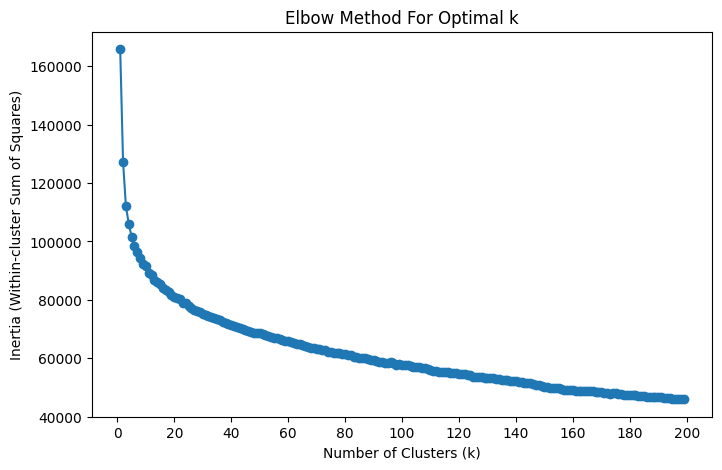

In [52]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

inertias = []
cluster_range = range(1, 200)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(trained_anime_embeddings)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-cluster Sum of Squares)")
plt.title("Elbow Method For Optimal k")
plt.xticks(range(0, 201, 20))
plt.show()


In [53]:
n_clusters = 12
kmeans = KMeans(n_clusters=n_clusters,random_state=0).fit(trained_anime_embeddings)

In [54]:
for cluster in range(n_clusters):
    print(f'Cluster #{cluster}')
    animes = []
    for animeidx in np.where(kmeans.labels_ == cluster)[0]:
        animeid = train_set.idx2uanimeid[animeidx]
        rating_count = ratings_df.loc[ratings_df['anime_id'] == animeid].shape[0]
        animes.append((anime_names[animeid], rating_count))
    for anime in sorted(animes,key=lambda tup:tup[1],reverse=True)[:10]:
        print('\t', anime[0])

Cluster #0
	 Dagashi Kashi
	 Fate/kaleid liner Prisma☆Illya 2wei Herz!
	 Boruto: Naruto Next Generations
	 Binan Koukou Chikyuu Bouei-bu LOVE!
	 Ao no Kanata no Four Rhythm
	 Gaikotsu Kishi-sama, Tadaima Isekai e Odekakechuu
	 100-man no Inochi no Ue ni Ore wa Tatteiru
	 3D Kanojo: Real Girl
	 Gyakuten Saiban: Sono "Shinjitsu", Igi Ari!
	 Arifureta Shokugyou de Sekai Saikyou 2nd Season
Cluster #1
	 Dragon Ball Z
	 Dragon Ball
	 Great Teacher Onizuka
	 Dragon Ball GT
	 Gintama
	 Yuu☆Yuu☆Hakusho
	 Hajime no Ippo
	 JoJo no Kimyou na Bouken (TV)
	 Gyakkyou Burai Kaiji: Ultimate Survivor
	 Gintama'
Cluster #2
	 Aki no Puzzle
	 Kokuhaku
	 4.Eyes
	 An Expression
	 ?/Sankaku no Rhythm/Trump no Arasoi
	 A Smart Experiment
	 Aya Hito Shiki to Iu na no Ishi Hata
	 Akuma no Kairozu
	 Henshin Gattai! 5 tsu no Atsuki Tamashii
	 Good-by Elvis and USA
Cluster #3
	 Fate/stay night
	 Chobits
	 Shakugan no Shana
	 Zero no Tsukaima
	 Rosario to Vampire
	 School Days
	 Love Hina
	 ChäoS;HEAd
	 Zero no Tsuk

In [55]:
torch.save(model.state_dict(), "models/collaborative_weights.pth")

In [56]:
model.load_state_dict(torch.load('models/collaborative_weights.pth'))
model.eval()  

MatrixFactorization(
  (user_factors): Embedding(268664, 32)
  (item_factors): Embedding(13125, 32)
)

In [57]:
def recommend_anime(input_show_name, model, train_set, anime_names, top_n=10):
    # Create a mapping from show name to anime ID
    name_to_id = {name: aid for aid, name in anime_names.items()}
    
    # Check if the input show is in the dataset
    if input_show_name not in name_to_id:
        print("Show not found in the dataset.")
        return []
    
    # Get the anime ID from the input show name
    selected_anime_id = name_to_id[input_show_name]
    
    # Convert the anime ID to its corresponding index using train_set.animeid2idx
    if selected_anime_id not in train_set.animeid2idx:
        print("Anime ID not found in the mapping.")
        return []
    anime_idx = train_set.animeid2idx[selected_anime_id]
    
    # Retrieve the embedding of the selected show
    selected_embedding = model.item_factors.weight[anime_idx]
    
    # Retrieve all item embeddings
    all_embeddings = model.item_factors.weight  # shape: (n_items, n_factors)
    
    # Compute similarity scores; using dot product is a simple approach:
    similarities = torch.matmul(all_embeddings, selected_embedding)
    
    # Convert scores to a NumPy array for sorting
    similarities = similarities.detach().cpu().numpy()
    
    # Get indices sorted in descending order of similarity
    sorted_indices = similarities.argsort()[::-1]
    
    # Exclude the index of the selected show itself and take the top_n recommendations
    recommended_indices = [idx for idx in sorted_indices if idx != anime_idx][:top_n]
    
    # Map the indices back to anime IDs and then to names using train_set.idx2uanimeid and anime_names dictionary
    recommended_anime_ids = [train_set.idx2uanimeid[idx] for idx in recommended_indices]
    recommended_shows = [anime_names.get(aid, "Unknown") for aid in recommended_anime_ids]
    
    return recommended_shows

input_show = "Naruto"  
recommendations = recommend_anime(input_show, model, train_set, anime_names, top_n=10)
print("Recommended shows based on", input_show, ":", recommendations)


Recommended shows based on Naruto : ['Naruto: Shippuuden', 'Bleach', 'One Piece', 'Soul Eater', 'Death Note', 'Katekyo Hitman Reborn!', 'Lucky☆Star', 'Fullmetal Alchemist: Brotherhood', 'Naruto: Takigakure no Shitou - Ore ga Eiyuu Dattebayo!', 'Fairy Tail']


In [58]:
import pickle
with open('models/mappings.pkl', 'wb') as f:
    pickle.dump({
        'userid2idx': train_set.userid2idx,
        'animeid2idx': train_set.animeid2idx,
        'idx2uanimeid': train_set.idx2uanimeid
    }, f)
